In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
data = pd.read_csv(r'D:\Adriana Lucia\Materias (8Semestre)\Analisis de datos\DataSet\Vehicle dataset(Regresión lineal)\CAR DETAILS FROM CAR DEKHO.csv')


In [2]:

# Seleccionar variables dependientes
data = data[['Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine', 'Max Power']]

# Eliminar filas con valores nulos
data.dropna(inplace=True)

In [3]:
# Eliminar filas con valores nulos
data['Engine'] = data['Engine'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
data['Max Power'] = data['Max Power'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [4]:
# Convertir columnas categóricas en variables dummy
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Definir X y y
X = data.drop('Price', axis=1)
y = data['Price']

In [6]:
# Dividir el dataset en conjunto de train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Error Cuadrático Medio: {mse}')
print(f'R²: {r2}')

Error Cuadrático Medio: 991400362338.1818
R²: 0.7454748756845766


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo
model = RandomForestRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)


Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}


In [18]:
from sklearn.model_selection import train_test_split

# Separar los datos en conjunto de entrenamiento y conjunto de validación (80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=20)

# Ajustar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir en el conjunto de validación
y_pred = best_model.predict(X_val)

# Calcular MSE y R2
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R²: {r2}')

Error Cuadrático Medio: 581932882619.6938
R²: 0.8505986633465791


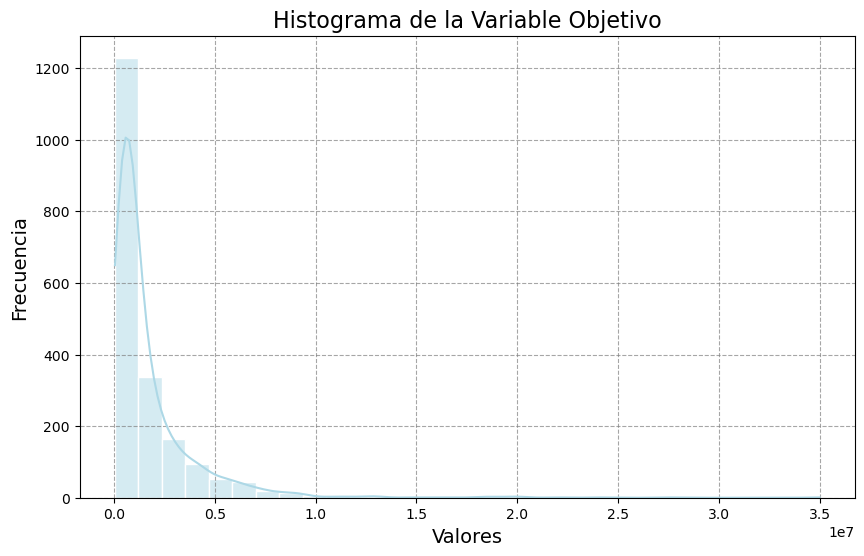

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='lightblue', edgecolor='white')
plt.title('Histograma de la Variable Objetivo', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(color='gray', linestyle='--', alpha=0.7)
plt.show()



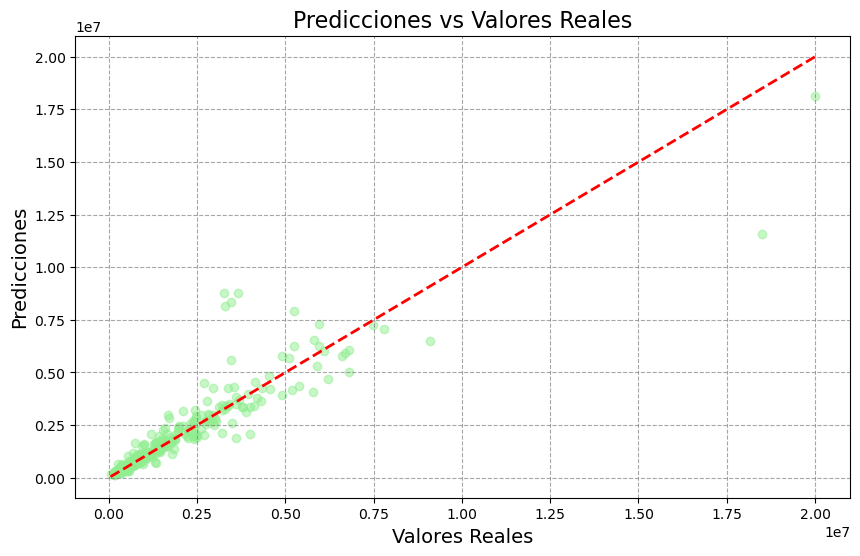

In [24]:
#predicciones
y_pred = best_model.predict(X_val)  # O el conjunto que estés usando

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='lightgreen')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Línea de identidad
plt.title('Predicciones vs Valores Reales', fontsize=16)
plt.xlabel('Valores Reales', fontsize=14)
plt.ylabel('Predicciones', fontsize=14)
plt.grid(color='gray', linestyle='--', alpha=0.7)
plt.show()


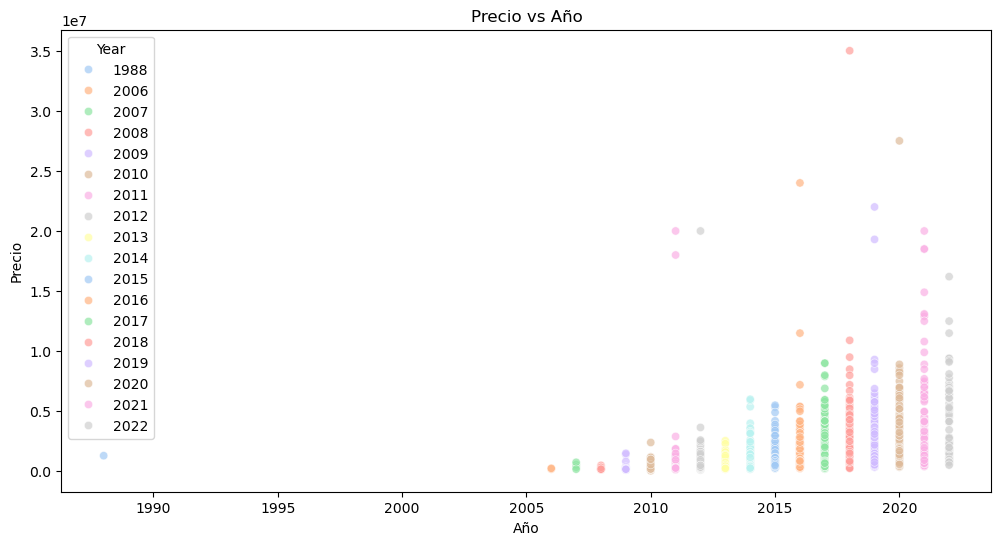

In [38]:
#year y price 
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Price', hue='Year', palette='pastel', alpha=0.7)
plt.title('Precio vs Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

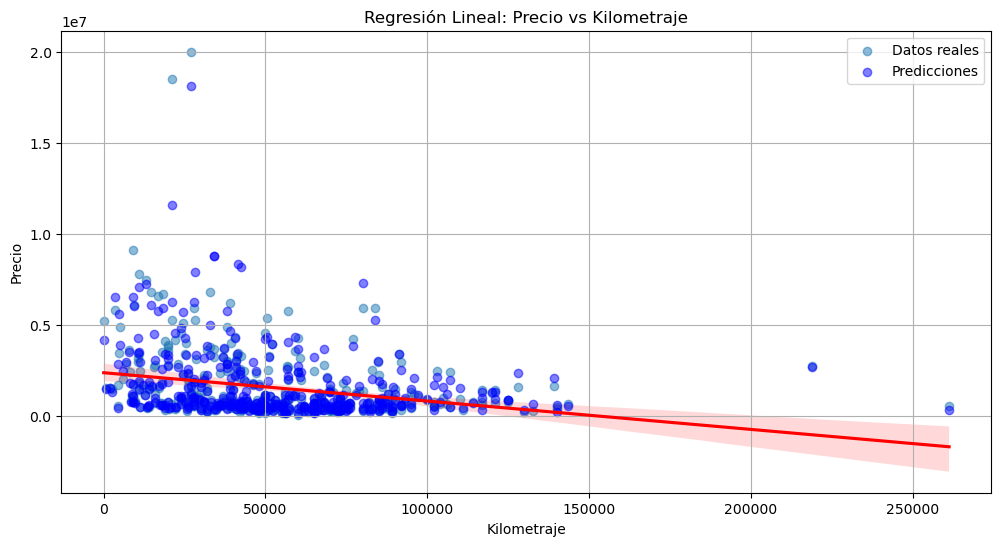

In [40]:
# Visualización de la regresión lineal
plt.figure(figsize=(12, 6))
sns.regplot(x=X_test['Kilometer'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, label='Datos reales')
plt.scatter(X_test['Kilometer'], y_pred, color='blue', alpha=0.5, label='Predicciones')
plt.title('Regresión Lineal: Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()